# Laboratorio: Contornos activos

**Nombre:** Kevin Fabricio Calle Urgilez

**Asignatura:** Percepción Computacional

**Fecha:** 23/05/18

Primero se importan las librerías necesarias que se usarán en este notebook:

In [3]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [27]:
# Se importan las librerías necesarias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.signal import convolve2d
from skimage import io, img_as_float, filters, data
import io

from skimage.filters import gaussian
from skimage.segmentation import active_contour

from skimage.segmentation import (morphological_chan_vese, active_contour, felzenszwalb, quickshift, 
                                 mark_boundaries, slic, clear_border, checkerboard_level_set)

from skimage import feature

from skimage.color import rgb2gray

from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import (active_contour, felzenszwalb, quickshift, 
                                 mark_boundaries, slic, clear_border)

import io


## 1. Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. El resultado tendrá que apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta».

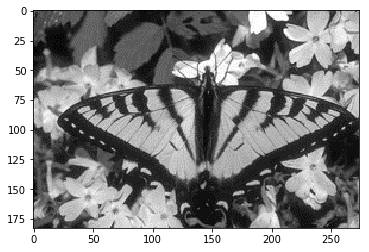

In [5]:
# Se carga la imagen y se la convierte a escala de grises

mariposa = data.imread('mariposa.png')
plt.imshow(mariposa, cmap = 'gray')

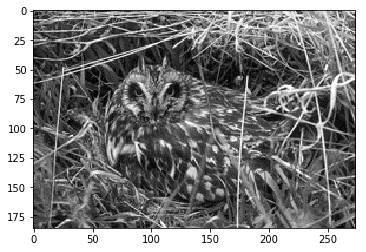

In [6]:
buho = data.imread('buho.png')
plt.imshow(buho, cmap = 'gray')

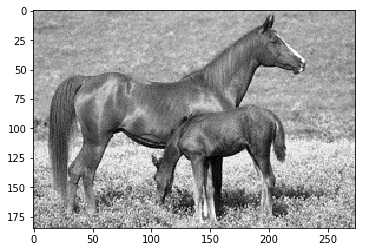

In [7]:
caballos = data.imread('caballos.png')
plt.imshow(caballos, cmap = 'gray')

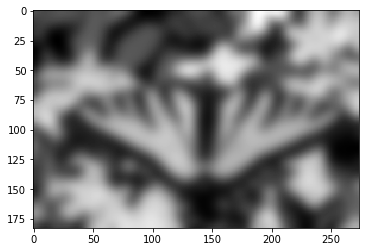

In [8]:
# Se utiliza el filtro de Prewitt paso alto para detectar los bordes de la imagen
mariposa_gauss = gaussian(mariposa, 5)

# se realiza el gráfico de la imagen
plt.imshow(mariposa_gauss, cmap='gray')
plt.show()

# Elementos estructurales

In [9]:
# Elementos tipo disco (los más empleados)
# Especificamos el radio del disco
elemento_estructural_disco = disk(5)
# Lo mostramos por pantalla
elemento_estructural_disco



array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

# Erosión

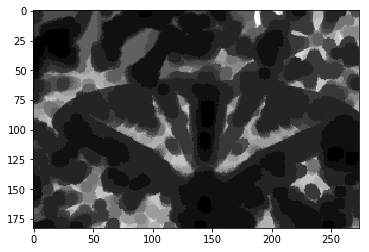

In [7]:
mariposa_eroded = erosion(mariposa,elemento_estructural_disco)

plt.imshow(mariposa_eroded, cmap = 'gray')

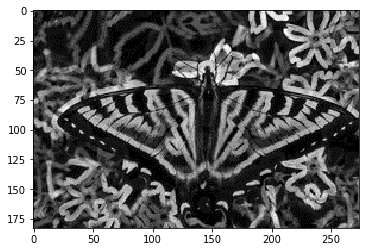

In [8]:
# Obtenemos la diferencia entre la imagen original y la imagen erosionada
plt.imshow(mariposa-mariposa_eroded, cmap = 'gray')

# Dilatación

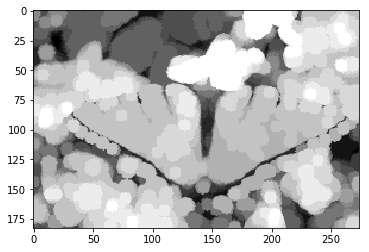

In [9]:
elemento_estructural_disco = disk(5)
mariposa_dilated = dilation(mariposa,elemento_estructural_disco)
plt.imshow(mariposa_dilated, cmap = 'gray')

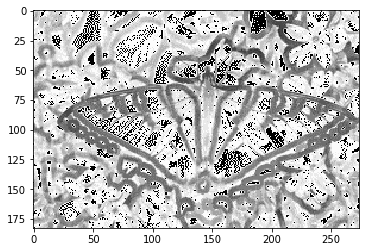

In [10]:
# Obtenemos la diferencia entre la imagen original y la imagen erosionada
plt.imshow(mariposa-mariposa_dilated, cmap = 'gray')

# Apertura

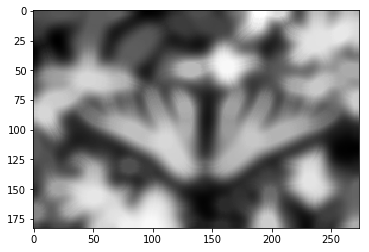

In [10]:
elemento_estructural_disco = disk(5)
mariposa_opening = opening(mariposa_gauss,elemento_estructural_disco)
plt.imshow(mariposa_opening, cmap = 'gray')

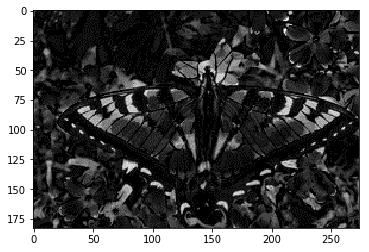

In [14]:
# Obtenemos la diferencia entre la imagen original y la imagen erosionada
plt.imshow(mariposa-mariposa_opening, cmap = 'gray')

# Clausura

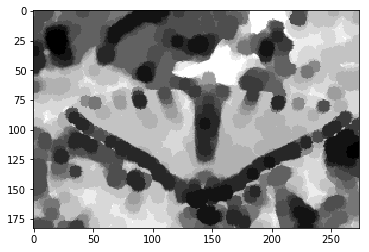

In [15]:
elemento_estructural_disco = disk(5)
mariposa_closing = closing(mariposa,elemento_estructural_disco)

plt.imshow(mariposa_closing, cmap = 'gray')

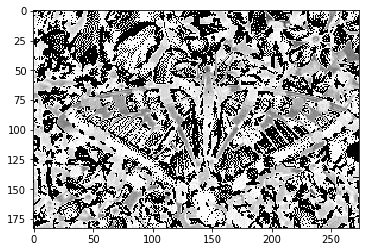

In [16]:
# Obtenemos la diferencia entre la imagen original y la imagen erosionada
plt.imshow(mariposa-mariposa_closing, cmap = 'gray')

# Detecci[on de Contornos

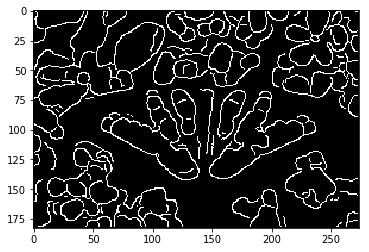

In [17]:
# Se utiliza el filtro de Prewitt paso alto para detectar los bordes de la imagen
#mariposa_filtro = filters.roberts(gaussian(mariposa_closing, 0.1))

mariposa_filtro = feature.canny(mariposa_opening, sigma=1)

# se realiza el gráfico de la imagen
plt.imshow(mariposa_filtro, cmap='gray')
plt.show()

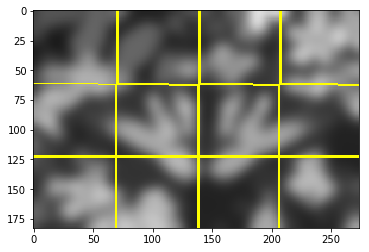

In [19]:
plt.imshow(mark_boundaries(mariposa_gauss,slic(mariposa_gauss,n_segments=10)))

In [38]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


In [39]:
# Morphological ACWE
image = img_as_float(mariposa_opening)

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)

In [35]:
s = np.linspace(0, 2*np.pi, 500)
# ¿Qué sucede si cambiamos estos números para que se detecte el iris?
x = 145 + 130*np.cos(s)
y = 100 + 80*np.sin(s)
init = np.array([x, y]).T

In [46]:
figura_umbralizado = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

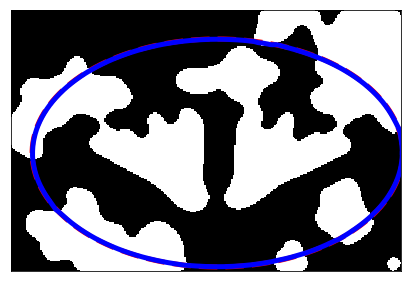

In [48]:
snake = active_contour(figura_umbralizado, # 5 para iris
                       init, 
                      alpha=0.015, beta=0.001, gamma=0.01)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(figura_umbralizado, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--r', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, mariposa.shape[1], mariposa.shape[0], 0])
plt.show()

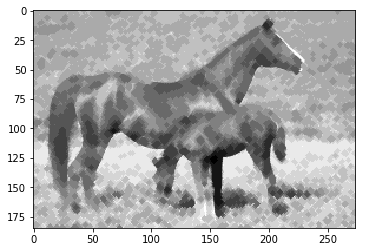

In [814]:
elemento_estructural_disco = disk(2)
caballos_closing = closing(caballos,elemento_estructural_disco)
#caballos_dilation = dilation(caballos,elemento_estructural_disco)
plt.imshow(caballos_closing, cmap = 'gray')



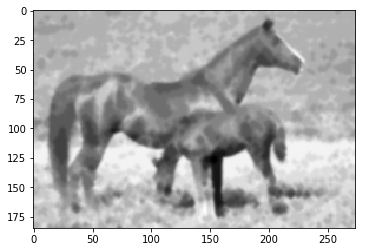

In [815]:
# Se utiliza el filtro de Prewitt paso alto para detectar los bordes de la imagen
caballos_gauss = gaussian(caballos_closing, 1)

# se realiza el gráfico de la imagen
plt.imshow(caballos_gauss, cmap='gray')
plt.show()

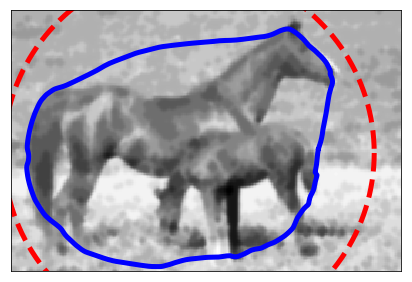

In [816]:
s = np.linspace(0, 2*np.pi, 500)
# ¿Qué sucede si cambiamos estos números para que se detecte el iris?
x = 125 + 130*np.cos(s)
y = 100 + 130*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(caballos_gauss, # 5 para iris
                       init, 
                      alpha=0.3, beta=0.01, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(caballos_gauss, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--r', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, mariposa.shape[1], mariposa.shape[0], 0])
plt.show()